In [ ]:
# Word-level one-hot encoding
import numpy as np

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

token_index = {}
for sample in samples:
  for word in sample.split():
    if word not in token_index:
      token_index[word]=len(token_index)+1

max_length = 10
results = np.zeros(shape=(len(samples), max_length, max(token_index.values())+1))

for i, sample in enumerate(samples):
  for j,word in list(enumerate(sample.split()))[:max_length]:
    index = token_index.get(word)
    results[i,j,index] = 1.

In [ ]:
print('token_index: ',token_index)
print('results: ',results)
# 토큰화 하고 one-hot encoding 완료

token_index:  {'The': 1, 'cat': 2, 'sat': 3, 'on': 4, 'the': 5, 'mat.': 6, 'dog': 7, 'ate': 8, 'my': 9, 'homework.': 10}
results:  [[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]]


In [ ]:
# Character-level one-hot encoding
import string

samples = ['The cat sat on the mat.', 'The dog ate my homework.']
characters = string.printable
token_index = dict(zip(range(1,len(characters)+1), characters))

max_length = 50
results = np.zeros((len(samples), max_length, max(token_index.keys())+1))
for i, sample in enumerate(samples):
  for j, character in enumerate(sample):
    index = token_index.get(character)
    results[i,j,index]=1.

In [ ]:
print('token_index: ',token_index)
print('results: ',results)
# 매 글자마다 인코딩

token_index:  {1: '0', 2: '1', 3: '2', 4: '3', 5: '4', 6: '5', 7: '6', 8: '7', 9: '8', 10: '9', 11: 'a', 12: 'b', 13: 'c', 14: 'd', 15: 'e', 16: 'f', 17: 'g', 18: 'h', 19: 'i', 20: 'j', 21: 'k', 22: 'l', 23: 'm', 24: 'n', 25: 'o', 26: 'p', 27: 'q', 28: 'r', 29: 's', 30: 't', 31: 'u', 32: 'v', 33: 'w', 34: 'x', 35: 'y', 36: 'z', 37: 'A', 38: 'B', 39: 'C', 40: 'D', 41: 'E', 42: 'F', 43: 'G', 44: 'H', 45: 'I', 46: 'J', 47: 'K', 48: 'L', 49: 'M', 50: 'N', 51: 'O', 52: 'P', 53: 'Q', 54: 'R', 55: 'S', 56: 'T', 57: 'U', 58: 'V', 59: 'W', 60: 'X', 61: 'Y', 62: 'Z', 63: '!', 64: '"', 65: '#', 66: '$', 67: '%', 68: '&', 69: "'", 70: '(', 71: ')', 72: '*', 73: '+', 74: ',', 75: '-', 76: '.', 77: '/', 78: ':', 79: ';', 80: '<', 81: '=', 82: '>', 83: '?', 84: '@', 85: '[', 86: '\\', 87: ']', 88: '^', 89: '_', 90: '`', 91: '{', 92: '|', 93: '}', 94: '~', 95: ' ', 96: '\t', 97: '\n', 98: '\r', 99: '\x0b', 100: '\x0c'}
results:  [[[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1.

In [ ]:
from keras.datasets import imdb
from keras import preprocessing

max_features = 10000
maxlen = 500
batch_size = 32

(x_train, y_train), (x_test, y_test) = imdb.load_data(
    num_words = max_features)


17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
len(x_train[100])

158

In [ ]:
# padding 기능 - Truncate 도 진행함.
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [ ]:
len(x_train[100])

20

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train, 
                    epochs=10, 
                    batch_size=32, 
                    validation_split=0.2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 8)             80000     
                                                                 
 flatten (Flatten)           (None, 160)               0         
                                                                 
 dense (Dense)               (None, 1)                 161       
                                                                 
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 2s 3ms/step - loss: 0.6663 - acc: 0.6204 - val_loss: 0.6103 - val_acc: 0.6942
Epoch 2/10
625/625 [==============================] - 1s 2ms/step - loss: 0.5345 - acc: 0.7541 - val_loss: 0.5215 - val_acc: 0.7310
Epoch 3/10
625/625 [==============================

In [ ]:
history.history['val_acc']

[0.6941999793052673,
 0.7310000061988831,
 0.746999979019165,
 0.7570000290870667,
 0.7588000297546387,
 0.7576000094413757,
 0.7581999897956848,
 0.7570000290870667,
 0.7572000026702881,
 0.7501999735832214]

In [ ]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive/')

#!unzip -uq "/content/drive/MyDrive/data/aclImdb.zip" -d "/content/drive/MyDrive/data"

Mounted at /content/drive/


In [ ]:
#!unzip -uq "/content/drive/MyDrive/data/dogs-vs-cats.zip" -d "/content/drive/MyDrive/data"

file #1:  bad zipfile offset (local header sig):  0
file #2:  bad zipfile offset (local header sig):  27749


In [ ]:
# Processing the labels of the raw IMDB data
import os

imdb_dir = "/content/drive/MyDrive/data/aclmdb2/aclImdb"
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
  dir_name = os.path.join(train_dir, label_type)
  for fname in os.listdir(dir_name):
    if fname[-4:] == '.txt':
      # open txt file
      f = open(os.path.join(dir_name, fname))
      texts.append(f.read())
      # insert text in texts list
      f.close()
      if label_type == 'neg':
        labels.append(0)
        # if the text was in neg, label it as 0
      else:
        labels.append(1)
        # if the text was in pos, label it as 1


KeyboardInterrupt: ignored

In [ ]:
# Tokenizing the text of the raw IMDB data
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100
training_samples = 200
validation_samples = 10000
max_words = 10000

tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples+validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]


In [ ]:
# Parsing the GloVe word-embeddings file
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

path_to_glove_file = os.path.join(
    os.path.expanduser("~"), ".keras/datasets/glove.6B.100d.txt"
)

embeddings_index = {}
for line in f:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

In [ ]:
# Preparing the GloVe word-embeddings matrix
embedding_dim = 100
embedding_matrix = np.zeros((max_words,embedding_dim))
for word, i in word_index.items():
  if i < max_words:
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
      embedding_matrix[i] = embedding_vector

In [ ]:
# Model definition
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

In [ ]:
# Loading pretrained word embeddings into the Embedding layer
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [ ]:
# Compile and train the model
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])
history = model.fit(x_train, y_train,
                    epochs = 10,
                    batch_size = 32,
                    validation_data = (x_val, y_val))
model.save_weights('pretrained_glove_model.h5')

In [ ]:
# Plotting the results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.histort['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'bo', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'bo', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()


plt.show()

In [ ]:
'''
# Pseudocode RNN

state_t = 0
for input_t in input_sequence:
  output_t = f(input_t, state_t)
  state_t = output_t

# More detailed pseudocode for the RNN
state_t = 0
for input_t in input_sequence:
  output_t = activation(dot(W, input_t) + dot(U,state_t) + b)
  state_t = output_t
'''

'\n# Pseudocode RNN\n\nstate_t = 0\nfor input_t in input_sequence:\n  output_t = f(input_t, state_t)\n  state_t = output_t\n\n# More detailed pseudocode for the RNN\nstate_t = 0\nfor input_t in input_sequence:\n  output_t = activation(dot(W, input_t) + dot(U,state_t) + b)\n  state_t = output_t\n'

In [ ]:
# Let's make the structure of RNN using Numpy
import numpy as np

timesteps = 100
input_features = 32
output_features = 64

inputs = np.random.random((timesteps, input_features))
state_t = np.zeros((output_features,))

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

successive_outputs = []
for input_t in inputs:
  output_t = np.tanh(np.dot(W,input_t) + np.dot(U,state_t)+b)
  successive_outputs.append(output_t)
  state_t = output_t

final_output_sequence = np.concatenate(successive_outputs, axis=0)

In [ ]:
# Let's use SimpleRNN from keras
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
model = Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [ ]:

from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
model = Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
model = Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 32)                2080      
                                                                 
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words = max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape: ', input_train.shape)
print('input_test shape: ', input_test.shape)


Loading data...
17473536/17464789 [==============================] - 0s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape:  (25000, 500)
input_test shape:  (25000, 500)


In [ ]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics=['acc'])
history = model.fit(input_train, y_train, 
                    epochs=10,
                    batch_size = 128,
                    validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 28s 163ms/step - loss: 0.6058 - acc: 0.6647 - val_loss: 0.4912 - val_acc: 0.7868
Epoch 2/10
157/157 [==============================] - 24s 152ms/step - loss: 0.3785 - acc: 0.8429 - val_loss: 0.3685 - val_acc: 0.8466
Epoch 3/10
157/157 [==============================] - 23s 147ms/step - loss: 0.2603 - acc: 0.9006 - val_loss: 0.4042 - val_acc: 0.8136
Epoch 4/10
157/157 [==============================] - 23s 147ms/step - loss: 0.2025 - acc: 0.9255 - val_loss: 0.3452 - val_acc: 0.8612
Epoch 5/10
157/157 [==============================] - 23s 149ms/step - loss: 0.1486 - acc: 0.9461 - val_loss: 0.6507 - val_acc: 0.7804
Epoch 6/10
157/157 [==============================] - 24s 151ms/step - loss: 0.1271 - acc: 0.9557 - val_loss: 0.4856 - val_acc: 0.8316
Epoch 7/10
157/157 [==============================] - 23s 148ms/step - loss: 0.0803 - acc: 0.9737 - val_loss: 0.4785 - val_acc: 0.8286
Epoch 8/10
157/157 [==============================] - 2

In [ ]:
# Dense 와 RNN 성능비교
from keras.datasets import imdb
from keras import preprocessing

max_features = 10000
maxlen = 500
batch_size = 32

(x_train, y_train), (x_test, y_test) = imdb.load_data(
    num_words = max_features)

# padding 기능 - Truncate 도 진행함.
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

# Dense
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding, SimpleRNN

model_dense = Sequential()
model_dense.add(Embedding(10000, 8, input_length=maxlen))
model_dense.add(Flatten())
model_dense.add(Dense(1, activation='sigmoid'))
model_dense.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model_dense.summary()

history_dense = model_dense.fit(x_train, y_train, 
                    epochs=10, 
                    batch_size=128, 
                    validation_split=0.2)

# RNN
from keras.layers import Dense

model_rnn = Sequential()
model_rnn.add(Embedding(max_features, 32))
model_rnn.add(SimpleRNN(32))
model_rnn.add(Dense(1, activation='sigmoid'))

model_rnn.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics=['acc'])
history_rnn = model_rnn.fit(x_train, y_train, 
                    epochs=10,
                    batch_size = 128,
                    validation_split = 0.2)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 500, 8)            80000     
                                                                 
 flatten_1 (Flatten)         (None, 4000)              0         
                                                                 
 dense_1 (Dense)             (None, 1)                 4001      
                                                                 
Total params: 84,001
Trainable params: 84,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
157/157 [==============================] - 2s 8ms/step - loss: 0.6531 - acc: 0.6427 - val_loss: 0.5559 - val_acc: 0.7594
Epoch 2/10
157/157 [==============================] - 1s 8ms/step - loss: 0.4319 - acc: 0.8411 - val_loss: 0.3687 - val_acc: 0.8588
Epoch 3/10
157/157 [==============================

Text(0.5, 1.0, 'Training and validation acc')

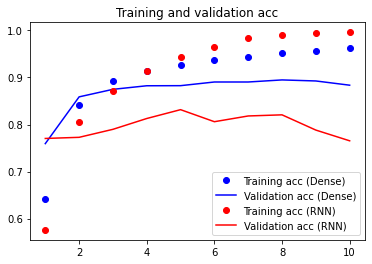

In [ ]:
# Plotting
import matplotlib.pyplot as plt

acc_dense = history_dense.history['acc']
val_acc_dense = history_dense.history['val_acc']
loss_dense = history_dense.history['loss']
val_loss_dense = history_dense.history['val_loss']

acc_rnn = history_rnn.history['acc']
val_acc_rnn = history_rnn.history['val_acc']
loss_rnn = history_rnn.history['loss']
val_loss_rnn = history_rnn.history['val_loss']

epochs = range(1, len(acc_dense)+1)

plt.plot(epochs, acc_dense, 'bo', label='Training acc (Dense)')
plt.plot(epochs, val_acc_dense, 'b', label='Validation acc (Dense)')
plt.plot(epochs, acc_rnn, 'ro', label='Training acc (RNN)')
plt.plot(epochs, val_acc_rnn, 'r', label='Validation acc (RNN)')
plt.legend()
plt.title('Training and validation acc')


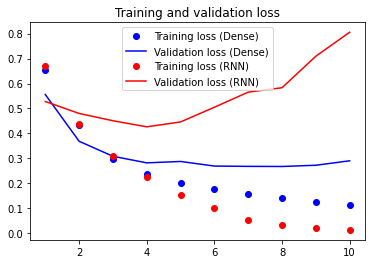

In [ ]:

plt.plot(epochs, loss_dense, 'bo', label='Training loss (Dense)')
plt.plot(epochs, val_loss_dense, 'b', label='Validation loss (Dense)')
plt.plot(epochs, loss_rnn, 'ro', label='Training loss (RNN)')
plt.plot(epochs, val_loss_rnn, 'r', label='Validation loss (RNN)')
plt.title('Training and validation loss')
plt.legend()

This small recurrent network doesn't perfoem well compared to the simple Dense NN. Because SimpleRNN is generally too simple to be of real use. 

1. Simple RNN - long term dependencies are impossible to learn. (Vanishing gradient problem)

The application of RNN -> LSTM GRU 

1. LSTM/GRU - saves information for later, thus preventing older signals from gradually vanishing during proccessing.

In [ ]:
# LSTM
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding, LSTM

model_lstm = Sequential()
model_lstm.add(Embedding(max_features, 32))
model_lstm.add(LSTM(32))
model_lstm.add(Dense(1, activation='sigmoid'))
model_lstm.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model_lstm.summary()

history_lstm = model_lstm.fit(x_train, y_train, 
                    epochs=10, 
                    batch_size=128, 
                    validation_split=0.2)


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
157/157 [==============================] - 73s 447ms/step - loss: 0.5299 - acc: 0.7490 - val_loss: 0.4174 - val_acc: 0.8228
Epoch 2/10
157/157 [==============================] - 71s 451ms/step - loss: 0.3088 - acc: 0.8795 - val_loss: 0.3051 - val_acc: 0.8746
Epoch 3/10
157/157 [======================

Text(0.5, 1.0, 'Training and validation acc')

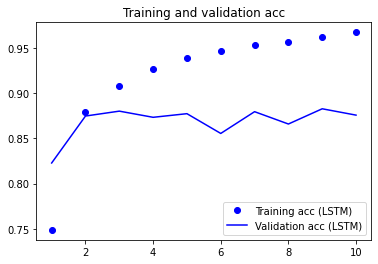

In [ ]:

acc_lstm = history_lstm.history['acc']
val_acc_lstm = history_lstm.history['val_acc']
loss_lstm = history_lstm.history['loss']
val_loss_lstm = history_lstm.history['val_loss']

plt.plot(epochs, acc_lstm, 'bo', label='Training acc (LSTM)')
plt.plot(epochs, val_acc_lstm, 'b', label='Validation acc (LSTM)')
plt.legend()
plt.title('Training and validation acc')

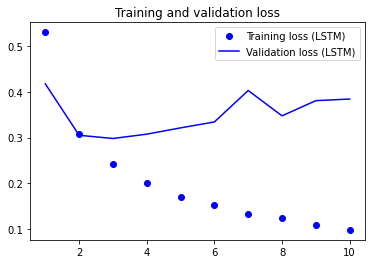

In [ ]:
plt.plot(epochs, loss_lstm, 'bo', label='Training loss (LSTM)')
plt.plot(epochs, val_loss_lstm, 'b', label='Validation loss (LSTM)')
plt.title('Training and validation loss')
plt.legend()

In [ ]:
# LSTM 이 RNN 보다 훨씬 좋은 성능을 보이고, DNN보다는 약간 더 좋은 결과를 보임.
# DNN과 별반 차이가 없는 것은 너무 쉬운 문장으로 구성이 되어 있기 때문에,
# 단순히 단어의 빈도를 통해서도 긍정 부정을 분별할 수 있기 때문.
# 그리고 단어의 빈도는 DNN이 잘 찾아내는 것 중 하나.

In [19]:
# A temperature-forecasting problem
!wget https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
!unzip jena_climate_2009_2016.csv.zip

--2022-01-30 13:58:37--  https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.88.126
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.88.126|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13565642 (13M) [application/zip]
Saving to: ‘jena_climate_2009_2016.csv.zip’

jena_climate_2009_2 100%[===================>]  12.94M  83.5MB/s    in 0.2s    

2022-01-30 13:58:37 (83.5 MB/s) - ‘jena_climate_2009_2016.csv.zip’ saved [13565642/13565642]

Archive:  jena_climate_2009_2016.csv.zip
  inflating: jena_climate_2009_2016.csv  
  inflating: __MACOSX/._jena_climate_2009_2016.csv  


In [20]:
import os
data_dir = "/content"
fname = os.path.join(data_dir, 'jena_climate_2009_2016.csv')

f = open(fname)
data = f.read()
f.close()

lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:]

print(header)
print(len(lines))

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420451


In [21]:
# Let's convert all 420,451 lines of data into a Numpy array
# Parsing the data (parse : 분석하다)
import numpy as np

float_data = np.zeros((len(lines),len(header)-1))
for i, line in enumerate(lines):
  values = [float(x) for x in line.split(',')[1:]]
  float_data[i,:] = values

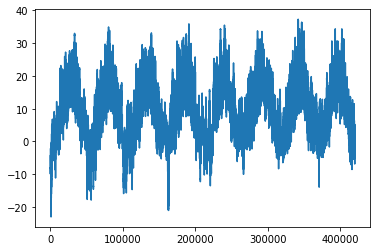

In [22]:
# Plotting the temperature timeseries
from matplotlib import pyplot as plt

temp = float_data[:,1] #<1> temperature (in degrees Celsius)
plt.plot(range(len(temp)),temp)

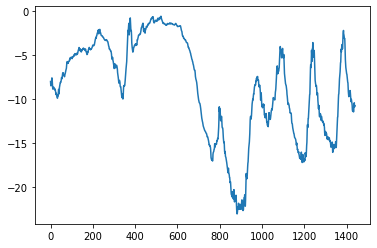

In [23]:
# plotting the first 10 days of the temperature timeseries
plt.plot(range(1440), temp[:1440])

# Let's predict the temperature at a daily scale

In [ ]:
# Normalizing the data
mean = float_data[:200000].mean(axis=0)
float_data -= mean
std = float_data[:200000].std(axis=0)
float_data /= std

In [25]:
# Generating yielding timeseries samples and their targets
def generator(data, lookback, delay, min_index, max_index,
              shuffle = False, batch_size = 128, step=6):
  if max_index is None:
    max_index = len(data) - delay - 1
  i = min_index + lookback
  while 1:
    if shuffle :
      rows = np.random.randint(
          min_index + lookback, max_index, size = batch_size)
    else:
      if i+ batch_size >= max_index:
        i = min_index + lookback
      rows = np.arange(i, min(i+batch_size, max_index))
      i += len(rows)

      samples = np.zeros((len(rows),
                          lookback // step,
                          data.shape[-1]))
      targets = np.zeros((len(rows),))
      for j, row in enumerate(rows):
        indices = range(rows[j]-lookback, rows[j], step)
        samples[j] = data[indices]
        targets[j] = data[rows[j]+delay][1]

      yield samples, targets

In [26]:
# Preparing the training, validation, and test generator
lookback = 1440
step = 6
delay = 144
batch_size = 128

train_gen = generator(float_data,
                      lookback=lookback,
                      delay=delay,
                      min_index = 0,
                      max_index = 200000,
                      shuffle = True,
                      step = step,
                      batch_size = batch_size
                      )
val_gen = generator(float_data,
                      lookback=lookback,
                      delay=delay,
                      min_index = 200001,
                      max_index = 300000,
                      step = step,
                      batch_size = batch_size
                      )
train_gen = generator(float_data,
                      lookback=lookback,
                      delay=delay,
                      min_index = 300001,
                      max_index = None,
                      step = step,
                      batch_size = batch_size
                      )
val_steps = (300000-200001-lookback)
test_steps = (len(float_data) - 300001 - lookback)

In [27]:
def evaluate_naive_method():
  batch_maes = []
  for step in range(val_steps):
    samples, targets = next(val_gen)
    preds = samples[:, -1, 1]
    mae = np.mean(np.abs(preds - targets))
    batch_maes.append(mae)


In [ ]:
# Training and evaluating a densely connected model
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Flatten(input_shape = (lookback//step, float_data.shape[-1])))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))
# Flatten -> 시간의 연관성이 다 사라져버림

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data = val_gen,
                              validation_steps = (300000-200001-lookback))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  app.launch_new_instance()


Epoch 1/20
500/500 [==============================] - 1171s 2s/step - loss: 2.7197 - val_loss: 1.3309
Epoch 2/20
500/500 [==============================] - 1120s 2s/step - loss: 2.6848 - val_loss: 1.7180
Epoch 3/20
500/500 [==============================] - 1290s 3s/step - loss: 2.3480 - val_loss: 2.0181
Epoch 4/20
500/500 [==============================] - 1170s 2s/step - loss: 1.6490 - val_loss: 1.0472
Epoch 5/20
500/500 [==============================] - 1170s 2s/step - loss: 1.4476 - val_loss: 0.9479
Epoch 6/20
500/500 [==============================] - 1121s 2s/step - loss: 1.1974 - val_loss: 1.4618
Epoch 7/20
500/500 [==============================] - 1170s 2s/step - loss: 0.8006 - val_loss: 1.0348
Epoch 8/20
500/500 [==============================] - 1170s 2s/step - loss: 0.8321 - val_loss: 1.0452
Epoch 9/20
500/500 [==============================] - 1110s 2s/step - loss: 0.4901 - val_loss: 0.5447
Epoch 10/20
498/500 [============================>.] - ETA: 0s - loss: 0.4074

In [ ]:
# Plotting results
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [ ]:
# Training and evaluating a dropout-regularized GRU-based model
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32,
                     dropout=0.2,
                     recurrent_dropout=0.2,
                     input_shape = (None, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer = RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epochs = 500,
                              epochs=40,
                              validation_data = val_gen,
                              validation_steps = val_steps)

In [ ]:
# To prevent the bottle-neck phenomenon, increase the capacity of NN
# Training and evaluating a dropout-regularized, stacked GRU model
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32,
                     dropout=0.1,
                     recurrent_dropout=0.5,
                     return_sequences = True,
                     input_shape = (None, float_data.shape[-1])))
model.add(layers.GRU(64, activation='relu',
                     dropout=0.1, 
                     recurrent_dropout=0.5))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch = 500,
                              epochs = 40,
                              validation_data = val_gen,
                              validation_steps = val_steps)

In [3]:
# Analyzing Sequences using 1D convolutional network
# Preparing the IMDB data
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
max_len = 500

print("Loading data...")
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = max_features)
print(len(x_train),'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen = max_len)
print('x_train shape:', x_train.shape)
print('x_test shape', x_test.shape)



Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 500)
x_test shape (25000, 500)


In [5]:
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length = max_len))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

model.summary()

model.compile(optimizer=RMSprop(lr=1e-4),
              loss = 'binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10,
                    batch_size = 128,
                    validation_split = 0.2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 128)          1280000   
                                                                 
 conv1d (Conv1D)             (None, 494, 32)           28704     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 98, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 92, 32)            7200      
                                                                 
 global_max_pooling1d (Globa  (None, 32)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 1)                 3

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/10
157/157 [==============================] - 74s 462ms/step - loss: 0.7479 - acc: 0.5168 - val_loss: 0.6870 - val_acc: 0.5726
Epoch 2/10
157/157 [==============================] - 76s 484ms/step - loss: 0.6700 - acc: 0.6621 - val_loss: 0.6706 - val_acc: 0.6266
Epoch 3/10
157/157 [==============================] - 72s 461ms/step - loss: 0.6325 - acc: 0.7502 - val_loss: 0.6301 - val_acc: 0.6946
Epoch 4/10
157/157 [==============================] - 72s 456ms/step - loss: 0.5571 - acc: 0.8034 - val_loss: 0.5358 - val_acc: 0.7734
Epoch 5/10
157/157 [==============================] - 72s 459ms/step - loss: 0.4682 - acc: 0.8361 - val_loss: 0.4743 - val_acc: 0.8010
Epoch 6/10
157/157 [==============================] - 72s 457ms/step - loss: 0.3798 - acc: 0.8604 - val_loss: 0.4204 - val_acc: 0.8354
Epoch 7/10
157/157 [==============================] - 72s 458ms/step - loss: 0.3230 - acc: 0.8841 - val_loss: 0.4013 - val_acc: 0.8530
Epoch 8/10
157/157 [==============================] - 7

In [ ]:
# Training and evaluating a simple 1D convnet on the Jena data
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Conv1D(32, 5, activation='relu',
                        input_shape = (None, float_data.shape[-1])))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

model.compile(optimizer = RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch = 500,
                              epochs = 20,
                              validation_data = val_gen,
                              validation_steps = val_steps)


Text(0.5, 1.0, 'Training and validation acc')

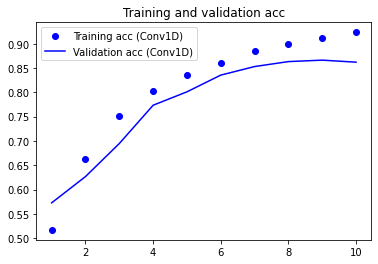

In [12]:
import matplotlib.pyplot as plt
acc_conv = history.history['acc']
val_acc_conv = history.history['val_acc']
loss_conv = history.history['loss']
val_loss_conv = history.history['val_loss']
epochs = range(1,11)

plt.plot(epochs, acc_conv, 'bo', label='Training acc (Conv1D)')
plt.plot(epochs, val_acc_conv, 'b', label='Validation acc (Conv1D)')
plt.legend()
plt.title('Training and validation acc')

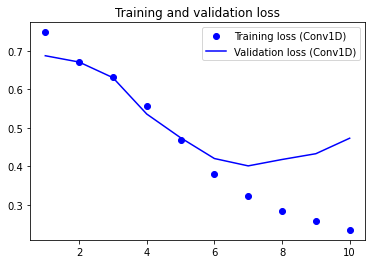

In [13]:
plt.plot(epochs, loss_conv, 'bo', label='Training loss (Conv1D)')
plt.plot(epochs, val_loss_conv, 'b', label='Validation loss (Conv1D)')
plt.title('Training and validation loss')
plt.legend()

In [ ]:
# Training and evaluating a simple 1D convnet on the Jena data
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Conv1D(32, 5, activation='relu',
                        input_shape = (None, float_data.shape[-1])))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

model.compile(optimizer = RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data = val_gen,
                              validation_steps = val_steps)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/20
500/500 [==============================] - 2253s 5s/step - loss: 6.0456 - val_loss: 6.8570
Epoch 2/20
500/500 [==============================] - 2094s 4s/step - loss: 9.3153 - val_loss: 8.7109
Epoch 3/20
500/500 [==============================] - 2078s 4s/step - loss: 7.0197 - val_loss: 7.3814
Epoch 4/20
500/500 [==============================] - ETA: 0s - loss: 6.5411

In [ ]:
# Preparing higher-resolution data generators for the Jena dataset
step = 3
lookback = 720
delay = 144

train_gen = generator(float_data,
                      lookback = lookback,
                      delay = delay,
                      min_index = 0,
                      max_index = 200000,
                      shuffle = True,
                      step = step)
val_gen = generator(float_data,
                    lookback = lookback,
                    delay = delay,
                    min_index = 200001,
                    max_index = 300000,
                    step = step)
test_gen = generator(float_data,
                     lookback = lookback,
                     delay = delay,
                     min_index = 300001,
                     max_index = None,
                     step = step)
val_steps = (300000-200001-lookback)//128
test_steps = (len(float_data)-300001-lookback)//128

In [ ]:
# Model combining a 1D convolutional base and a GRU layer
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Conv1D(32, 5, activation='relu', 
                        input_shape = (None, float_data.shape[-1])))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.GRU(32, dropout=0.1, recurrent_dropout = 0.5))
model.add(layers.Dense(1))

model.summary()
model.compile(optimizer = RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch = 500,
                              epochs = 20,
                              validation_data = val_gen,
                              validation_steps = val_steps)